# Classificação binária

#### Utilizando árvore de descisão para calcular a probabilidade de sobrevivência de uma pessoa baseada na base de dados do Titanic

#### Importação de bibliotecas

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



#### IMPORTANDO DADOS

In [43]:
df = pd.read_csv("titanic.csv")

In [44]:
df.head()

,id,sex,age,social_class,survived
0,0,1,22.0,3.0,no
1,1,0,38.0,1.0,yes
2,2,0,26.0,3.0,yes
3,3,0,35.0,1.0,yes
4,4,1,35.0,3.0,no


### Eliminando a colina id

In [45]:
df = df.drop("id", axis=1)

In [46]:
df

,sex,age,social_class,survived
0,1,22.000000,3.0,no
1,0,38.000000,1.0,yes
2,0,26.000000,3.0,yes
3,0,35.000000,1.0,yes
4,1,35.000000,3.0,no
5,1,29.699118,3.0,no
6,1,54.000000,1.0,no
7,1,2.000000,3.0,no
8,0,27.000000,3.0,yes
9,0,14.000000,2.0,yes


### Verificando integridade dos dados

In [47]:
df.describe()

,sex,age,social_class
count,891.000000,891.000000,891.000000
mean,0.647587,29.699118,2.308642
std,0.477990,13.002015,0.836071
min,0.000000,0.420000,1.000000
25%,0.000000,22.000000,2.000000
50%,1.000000,29.699118,3.000000
75%,1.000000,35.000000,3.000000
max,1.000000,80.000000,3.000000


### Visualizando as informações de uma única coluna

In [48]:
df['survived']

0       no
1      yes
2      yes
3      yes
4       no
5       no
6       no
7       no
8      yes
9      yes
10     yes
11     yes
12      no
13      no
14      no
15     yes
16      no
17     yes
18      no
19     yes
20      no
21     yes
22     yes
23     yes
24      no
25     yes
26      no
27      no
28     yes
29      no
      ... 
861     no
862    yes
863     no
864     no
865    yes
866    yes
867     no
868     no
869    yes
870     no
871    yes
872     no
873     no
874    yes
875    yes
876     no
877     no
878     no
879    yes
880    yes
881     no
882     no
883     no
884     no
885     no
886     no
887    yes
888     no
889    yes
890     no
Name: survived, dtype: object

### Contando os valores

In [49]:
df['survived'].value_counts()

no     549
yes    342
Name: survived, dtype: int64

### Trazendo os valores únicos da coluna

In [50]:
df.social_class.unique()

array([ 3.,  1.,  2.])

### Acessando valores dentro da matriz

In [51]:
df.iloc[3,3]

'yes'

### Mostrando quantidade de homens (sex==1) sobreviventes por classe social

In [52]:
df.loc[(df.sex==1) & (df.survived=='yes')   ,   'social_class'].value_counts()

3.0    47
1.0    45
2.0    17
Name: social_class, dtype: int64

### Plotando os dados

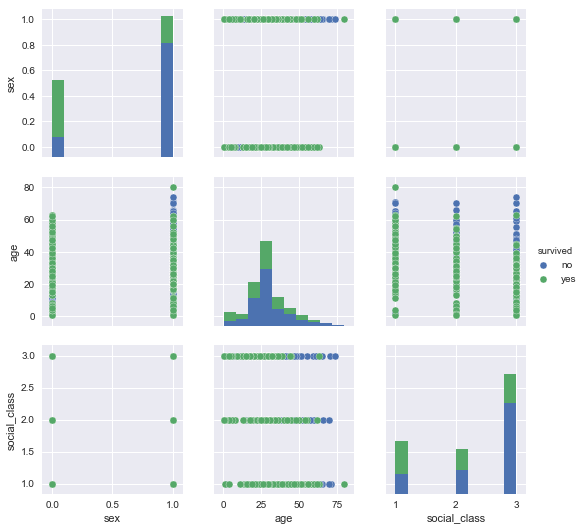

In [53]:
sb.pairplot(df, hue='survived' )

### Separando as features da resposta (eliminando a coluna survived) e passando para um vetor

In [54]:
X = np.array(df.drop('survived', axis=1))

In [55]:
X

array([[  1.        ,  22.        ,   3.        ],
       [  0.        ,  38.        ,   1.        ],
       [  0.        ,  26.        ,   3.        ],
       ..., 
       [  0.        ,  29.69911765,   3.        ],
       [  1.        ,  26.        ,   1.        ],
       [  1.        ,  32.        ,   3.        ]])

In [56]:
y = np.array(df.survived)

In [57]:
y

array(['no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',

## TREINAMENTO

### importando a biblioteca Skitlearn

In [58]:
from sklearn import tree

In [59]:
clf = tree.DecisionTreeClassifier()

In [60]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predição

## Sex, Age, SocialClass

#### Nesse momento indicamos três pessoas com seus respectivos atributos para saber se ela viveria ou não ao acidente

In [61]:
clf.predict([[0, 39, 3], 
             [1, 37, 3], 
             [1, 9, 3]])

array(['no', 'no', 'no'], dtype=object)

#### Agora calculamos a probabilidade de sobrevivência

In [62]:
clf.predict_proba(([[0, 39, 3], 
                    [1, 37, 3], 
                    [1, 9, 3]]))

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.5,  0.5]])

### Salvando o modelo

In [63]:
import pickle

#### wb = permissão de escrita / rb = permissão de leitura

In [71]:
filename = "titanic.plk"
pickle.dump(clf, open(filename, 'wb'))

### Carregando o modelo

In [72]:
cfl_loaded = pickle.load(open(filename, 'rb'))

### Usando o modelo para predição

In [73]:
cfl_loaded.predict([[0, 39, 3], 
             [1, 37, 3], 
             [1, 9, 3]])

array(['no', 'no', 'no'], dtype=object)